# Decision Tree - Feature Selection

In this notebook, we perform feature selection using the Decision Tree model. It enables us to detrmine the **relative importance of each feature**, then select the features of higher importance. 

The Decision Tree training algorithm, e.g., classification and regression trees (CART), provides importance scores of the features. It measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity based on the Gini index or entropy. 

In Scikit-Learn, we can get the feature importance scores by using the $feature\_importances\_$ attribute of the Decidsion Tree model.

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Dataset


We use the Iris dataset, which is a multivariate data set. 

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Total number of samples: 150

The dataset is also known as Fisher's Iris data set as it was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".


<img src="https://cse.unl.edu/~hasan/IrisFlowers.png" width=800 height=400>


## Explore the Dataset

In [2]:
iris = load_iris()

# See the key values
print("\nKey Values: \n", list(iris.keys()))

# The feature names
print("\nFeature Names: \n", list(iris.feature_names))

# The target names
print("\nTarget Names: \n", list(iris.target_names))

# The target values (codes)
#print("\nTarget Values: \n", list(iris.target))


Key Values: 
 ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

Feature Names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names: 
 ['setosa', 'versicolor', 'virginica']


## Create Data Matrix (X) and the 1D Target Array (y)

In [3]:
# Feature matrix
X = iris["data"]

# Target Array
y = iris["target"]


print("X shape: ", X.shape)
print("y shape: ", y.shape)

print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

X shape:  (150, 4)
y shape:  (150,)

X data type:  float64
y data type:  int64


## Train a Decision Tree Model

We train a Decision Tree model. Ideally, we must tune the hyperparameters.

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

y_predict = tree_clf.predict(X)

print("Accuracy: ", accuracy_score(y, y_predict))

Accuracy:  0.96


## Visualizing The Decision Tree

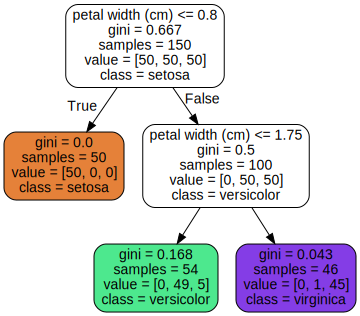

In [5]:
dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graph = graphviz.Source(dot_data)  

graph

## Feature Selection

Below we determine the importance of the Iris features using the trained Decison Tree model's $feature\_importances\_$ property. 

In [6]:
for i in range(len(iris.feature_names)):
    print("%10s : %.2f" % (iris.feature_names[i], tree_clf.feature_importances_[i]))

sepal length (cm) : 0.00
sepal width (cm) : 0.00
petal length (cm) : 0.00
petal width (cm) : 1.00


## Observation

We observe the two most important features are: 
- Petal length
- Petal width